In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import os

In [2]:
img = image.load_img(r'/home/akash/Desktop/Capstone-project/Train/Fire/dayroad263.jpg')

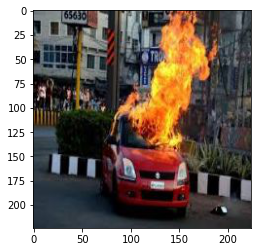

In [3]:
plt.imshow(img)

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [5]:
n = 46

In [6]:
train_dataset = train.flow_from_directory(r'/home/akash/Desktop/Capstone-project/Train',target_size=(n,n),batch_size=3,class_mode='binary')

validation_dataset = validation.flow_from_directory(r'/home/akash/Desktop/Capstone-project/Validation',target_size=(n,n),batch_size=3,class_mode='binary')

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
input_shape = (n, n, 3)

model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = 3, 
                                activation='relu',
                                input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2),
        
        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(1,activation='sigmoid')
        ])

In [8]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,epochs=18 ,validation_data=validation_dataset)

Epoch 1/18
2001/2001 [==============================] - 19s 9ms/step - loss: 0.6008 - accuracy: 0.6738 - val_loss: 0.3670 - val_accuracy: 0.8380
Epoch 2/18
2001/2001 [==============================] - 18s 9ms/step - loss: 0.3276 - accuracy: 0.8762 - val_loss: 0.3690 - val_accuracy: 0.8455
Epoch 3/18
2001/2001 [==============================] - 17s 9ms/step - loss: 0.2747 - accuracy: 0.8920 - val_loss: 0.2214 - val_accuracy: 0.9090
Epoch 4/18
2001/2001 [==============================] - 18s 9ms/step - loss: 0.2189 - accuracy: 0.9125 - val_loss: 0.2409 - val_accuracy: 0.8960
Epoch 5/18
2001/2001 [==============================] - 18s 9ms/step - loss: 0.2026 - accuracy: 0.9229 - val_loss: 0.2313 - val_accuracy: 0.9095
Epoch 6/18
2001/2001 [==============================] - 17s 9ms/step - loss: 0.1632 - accuracy: 0.9373 - val_loss: 0.2285 - val_accuracy: 0.9160
Epoch 7/18
2001/2001 [==============================] - 18s 9ms/step - loss: 0.1490 - accuracy: 0.9387 - val_loss: 0.3519 - val_ac

In [10]:
validation_dataset.class_indices

{'Fire': 0, 'Non-Fire': 1}

In [12]:
dir_path = r'/home/akash/Desktop/Capstone-project/Test/Non-Fire'

fire,nonfire = 0,0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(n,n))
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        fire+=1
        print(0,end=' ')
    else:
        nonfire+=1
        print(1,end=' ')

0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 

In [13]:
print(fire,nonfire)

468 532


In [14]:
dir_path = r'/home/akash/Desktop/Capstone-project/Test/Fire'

fire,nonfire = 0,0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(n,n))
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        fire+=1
        print(0,end=' ')
    else:
        nonfire+=1
        print(1,end=' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
print(fire,nonfire)

969 31
